# Indexing: Document Loading with DOCX2TXT Loader

In [ ]:
# Run the line of code below to check the version of langchain in the current environment.
# Substitute "langchain" with any other package name to check their version.

In [1]:
pip install DOCX2TXT

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show langchain

In [2]:
from langchain_community.document_loaders import Docx2txtLoader

In [3]:
loader_docx = Docx2txtLoader("Introduction_to_Data_and_Data_Science.docx")

In [4]:
pages_docx = loader_docx.load()

In [5]:
pages_docx

[Document(metadata={'source': 'Introduction_to_Data_and_Data_Science.docx'}, page_content="Analysis vs Analytics\n\nAlright! So…\nLet’s discuss the not-so-obvious differences\nbetween the terms analysis and analytics.\nDue to the similarity of the words, some people\nbelieve they share the same meaning, and thus\nuse them interchangeably. Technically, this\nisn’t correct. There is, in fact, a distinct\ndifference between the two. And the reason\nfor one often being used instead of the other\nis the lack of a transparent understanding\nof both.\nSo, let’s clear this up, shall we?\nFirst, we will start with analysis.\nConsider the following…\nYou have a huge dataset containing data of\nvarious types. Instead of tackling the entire\ndataset and running the risk of becoming overwhelmed,\nyou separate it into easier to digest chunks\nand study them individually and examine how\nthey relate to other parts. And that’s analysis\nin a nutshell.\nOne important thing to remember, however,\nis tha

# Indexing: Document Splitting with Character Text Splitter (Code Along)

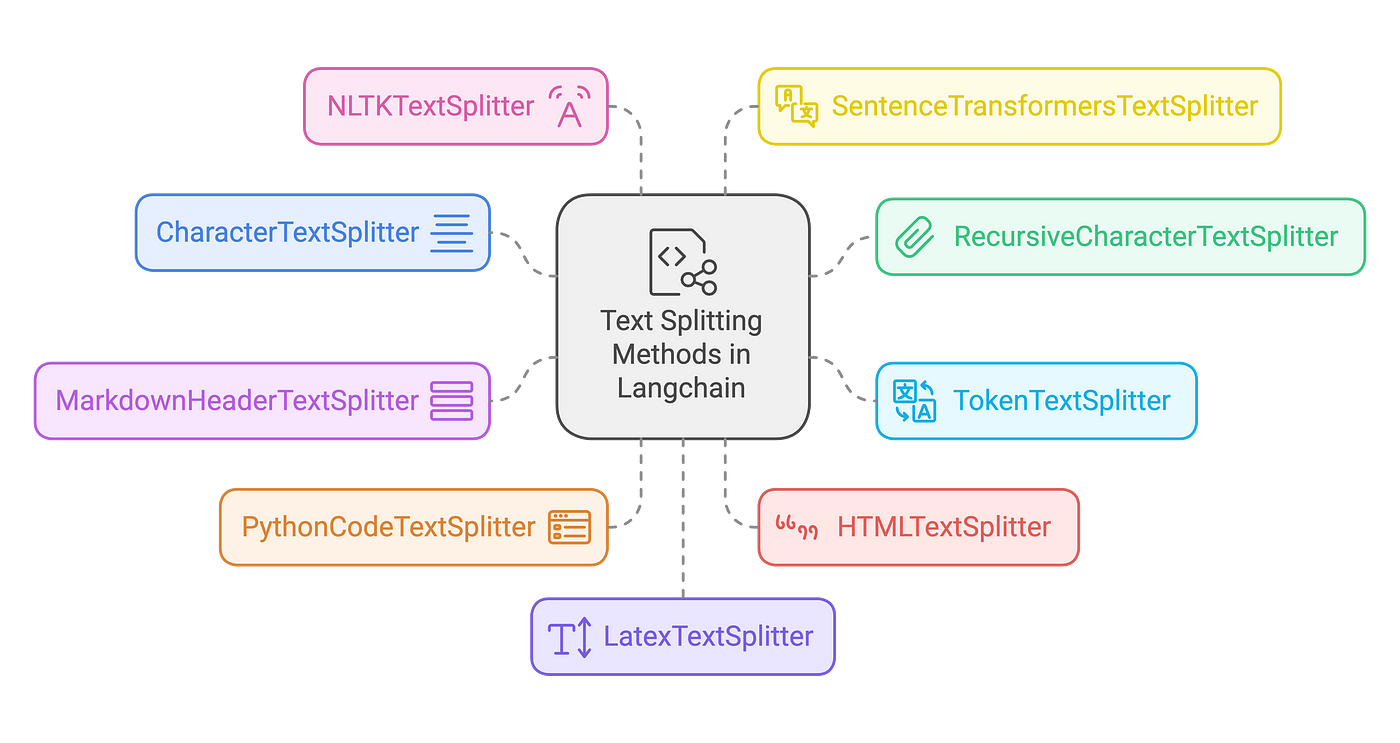

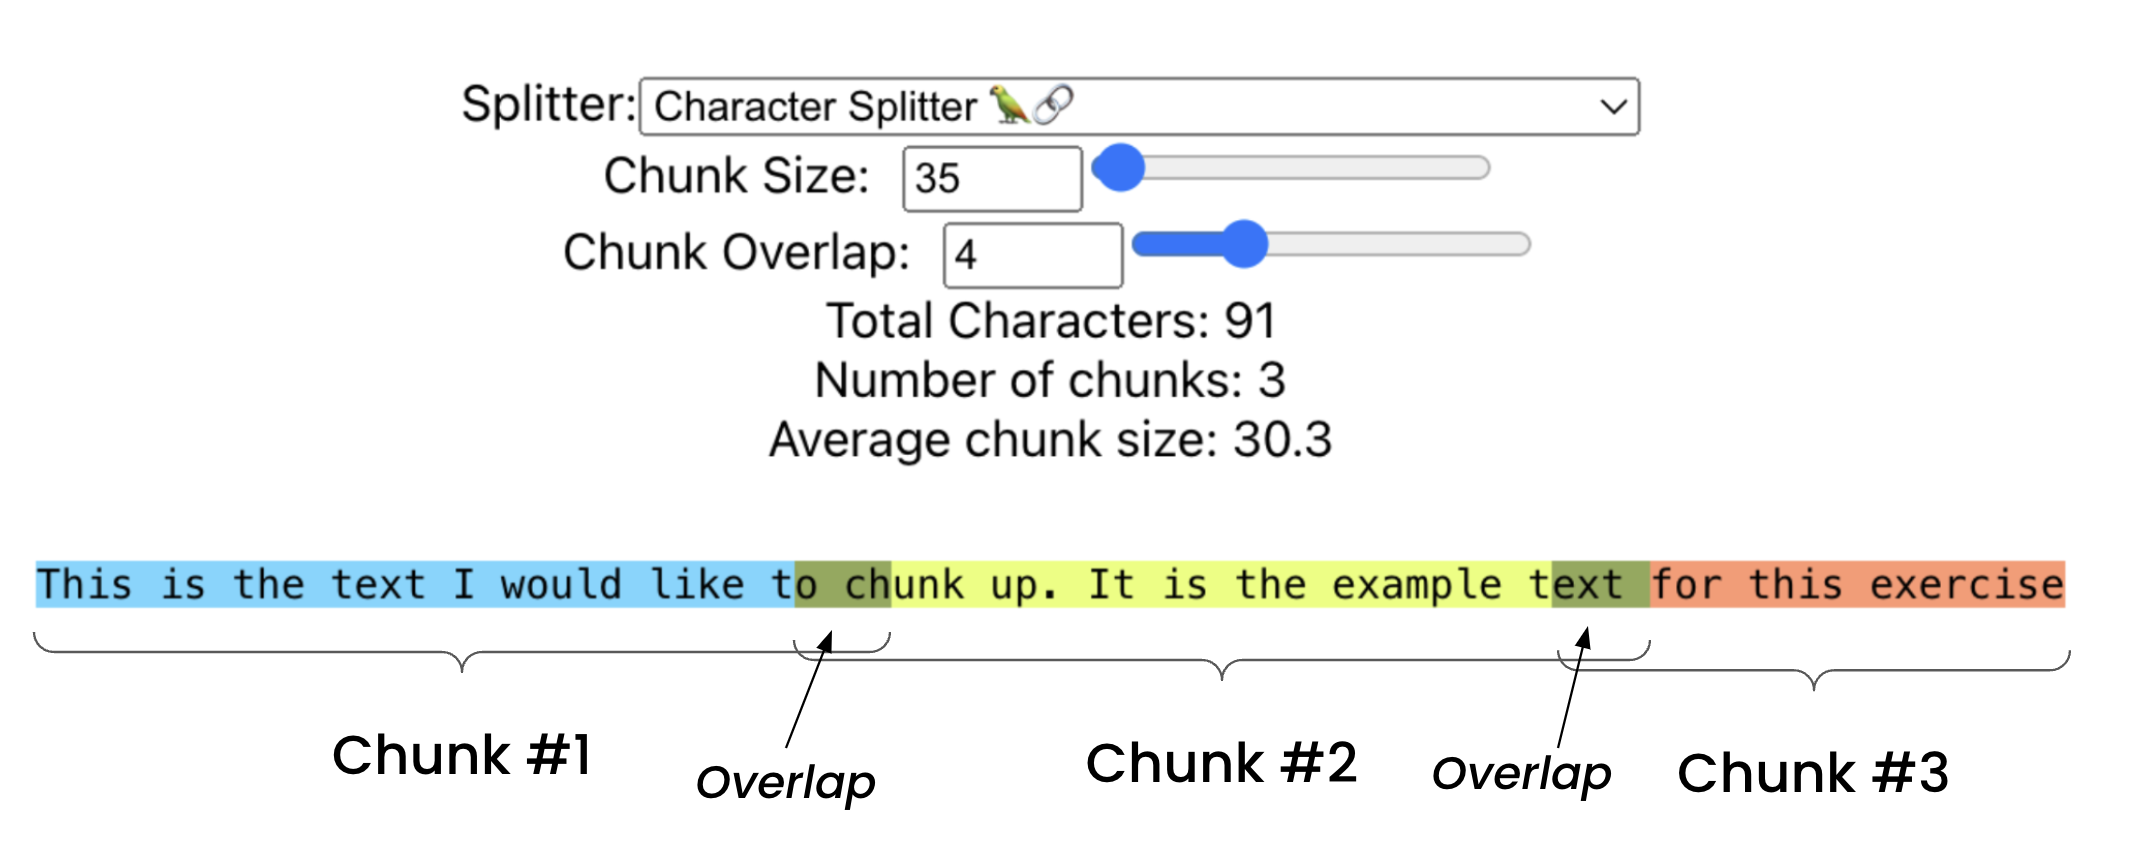!

In [6]:
from langchain_text_splitters.character import CharacterTextSplitter

In [7]:
loader = Docx2txtLoader("Introduction_to_Data_and_Data_Science.docx")
pages = loader.load()
for i in range(len(pages)):
    pages[i].page_content = ' '.join(pages[i].page_content.split())

In [8]:
pages[0].page_content

"Analysis vs Analytics Alright! So… Let’s discuss the not-so-obvious differences between the terms analysis and analytics. Due to the similarity of the words, some people believe they share the same meaning, and thus use them interchangeably. Technically, this isn’t correct. There is, in fact, a distinct difference between the two. And the reason for one often being used instead of the other is the lack of a transparent understanding of both. So, let’s clear this up, shall we? First, we will start with analysis. Consider the following… You have a huge dataset containing data of various types. Instead of tackling the entire dataset and running the risk of becoming overwhelmed, you separate it into easier to digest chunks and study them individually and examine how they relate to other parts. And that’s analysis in a nutshell. One important thing to remember, however, is that you perform analyses on things that have already happened in the past. Such as using an analysis to explain how a

In [9]:
len(pages[0].page_content)

8259

In [10]:
char_splitter = CharacterTextSplitter(separator = ".", 
                                      chunk_size = 500, 
                                      chunk_overlap = 50)

In [ ]:
# Another parameter we can specify is the chunk overlap.

# Chunk overlap corresponds to the number of characters overlapping between subsequent chunks.

# Let's continue our example.

# Consider our 1500 character document split into chunks of 500 characters each.

# We can now study how the number of splits will change if we introduce a chunk overlap of 50 characters.

# So the first chunk remains unchanged.

# The second chunk, however, begins with the last 50 characters from the first chunk, and continues

# by taking 450 characters from the rest of the text.

In [11]:
pages_char_split = char_splitter.split_documents(pages)

In [12]:
len(pages_char_split)

21

In [13]:
pages_char_split[0].page_content

'Analysis vs Analytics Alright! So… Let’s discuss the not-so-obvious differences between the terms analysis and analytics. Due to the similarity of the words, some people believe they share the same meaning, and thus use them interchangeably. Technically, this isn’t correct. There is, in fact, a distinct difference between the two. And the reason for one often being used instead of the other is the lack of a transparent understanding of both'

In [14]:
pages_char_split[1].page_content

'So, let’s clear this up, shall we? First, we will start with analysis. Consider the following… You have a huge dataset containing data of various types. Instead of tackling the entire dataset and running the risk of becoming overwhelmed, you separate it into easier to digest chunks and study them individually and examine how they relate to other parts. And that’s analysis in a nutshell'

In [15]:
len(pages_char_split[20].page_content)

184

In [16]:
char_splitter = CharacterTextSplitter(separator = "", 
                                      chunk_size = 500, 
                                      chunk_overlap = 0)

* separator=" " → Splits at spaces (preserves words).
* separator="\n" → Splits at newlines (good for paragraphs).
* separator="" → Splits at every character (less useful for NLP tasks).

In [17]:
pages_char_split = char_splitter.split_documents(pages)

In [18]:
len(pages_char_split)

17

In [19]:
8259/500

16.518

In [20]:
0.518*500

259.0

In [21]:
len(pages_char_split[16].page_content)

259

In [22]:
pages_char_split[16].page_content

'edom to create specific, ad-hoc tools for each project you are working on. Great! We hope we gave you a good idea about the level of applicability of the most frequently used programming and software tools in the field of data science. Thank you for watching!'

In [23]:
pages_char_split[15].page_content

'analysis are constantly applied. As a final note, remember the following. Should you have the relevant business and theoretical knowledge, learning a software tool is relatively easy as opposed to learning a programming language. More importantly, it will be sufficient for your need to create quick and accurate analyses. However, if your theoretical preparation is strong enough, you will find yourself restricted by software. Knowing a programming language such as R and Python, gives you the fre'